# Data pre  pre processing


In [0]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split


# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA as sklearnPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn import preprocessing
from sklearn.manifold import TSNE

#imbalance sampling
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler, Imputer


from sklearn import tree
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier


from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
import itertools
from sklearn import metrics


seed = 10

In [2]:
# Training data
app_train = pd.read_csv('../dataset/application_train.csv')
print('Training data shape: ', app_train.shape)

Training data shape:  (307511, 122)


In [3]:
# Testing data features
app_test = pd.read_csv('../dataset/application_test.csv')
print('Testing data shape: ', app_test.shape)

Testing data shape:  (48744, 121)


In [0]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [5]:
# Missing values statistics
missing_values = missing_values_table(app_train)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


In [6]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [7]:
# one-hot encoding of categorical variables
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 239)


In [8]:
train_labels = app_train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

# Add the target back in
app_train['TARGET'] = train_labels

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 240)
Testing Features shape:  (48744, 239)


In [9]:
train_y = app_train['TARGET']

# Drop the target from the training data
if 'TARGET' in app_train:
    train = app_train.drop(columns = ['TARGET'])
else:
    train = app_train.copy()
    
# Feature names
features = list(train.columns)

# Copy of the testing data
test = app_test.copy()

# Median imputation of missing values
imputer = Imputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
imputer.fit(train)

# Transform both training and testing data
train = imputer.transform(train)
test = imputer.transform(app_test)

# Repeat with the scaler
# scaler.fit(train)
# train = scaler.transform(train)
# test = scaler.transform(test)

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

X_train, X_test, y_train, y_test = train_test_split(train, train_y, test_size=0.33, random_state=seed)



Training data shape:  (307511, 239)
Testing data shape:  (48744, 239)


Training Cross Validation: 91.93 %
Test Accuraccy: 91.92 %
F1 Score: 0.00


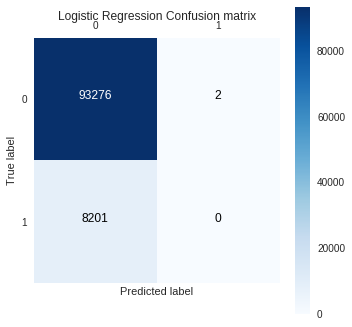

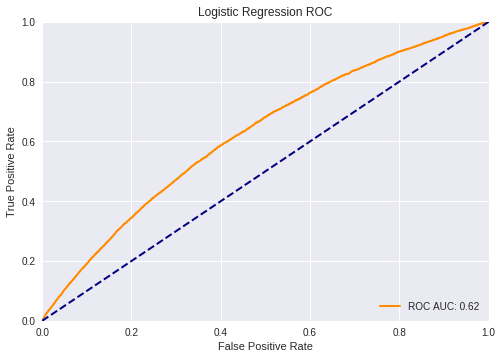

In [10]:
log_reg = LogisticRegression(C = 0.0001)
log_reg.fit(X_train, y_train)

# get prediction accuracy
crossVal = cross_val_score(log_reg, X_train, y_train, cv=5)
print("Training Cross Validation: %0.2f" % (sum(crossVal) / float(len(crossVal)) * 100), "%")
accuracy = log_reg.score(X_test, y_test)
print("Test Accuraccy: %0.2f" % (accuracy * 100), "%")

#F1 Score
y_predicted = log_reg.predict(X_test)
print("F1 Score: %0.2f" % f1_score(y_test, y_predicted))

# Confusion Matrix
log_reg_confusion = metrics.confusion_matrix(y_test, y_predicted)

plt.matshow(log_reg_confusion, cmap=plt.cm.Blues)
plt.grid(b=False)
plt.title("Logistic Regression Confusion matrix")
plt.colorbar()
thresh = log_reg_confusion.max() / 2.
for i, j in itertools.product(range(log_reg_confusion.shape[0]), range(log_reg_confusion.shape[1])):
    plt.text(j, i, log_reg_confusion[i, j],
    horizontalalignment="center",
    color="white" if log_reg_confusion[i, j] > thresh else "black")
plt.ylabel('True label')
plt.xlabel('Predicted label')

scores = log_reg.predict_proba(X_test)[:, 1]
    
# roc graph 
fpr, tpr, _ = metrics.roc_curve(y_test, scores)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC AUC: %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC')
plt.legend(loc="lower right")
plt.show()

Training Cross Validation: 85.21 %
Test Accuraccy: 85.39 %
F1 Score: 0.15


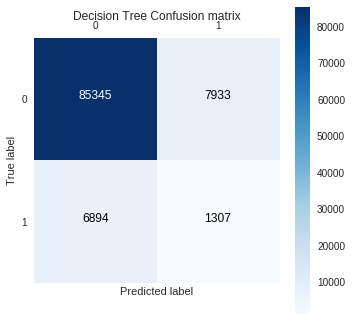

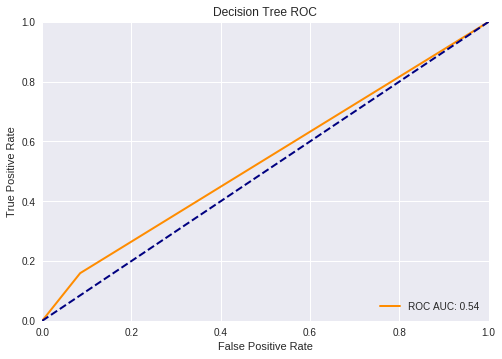

In [11]:
# train decision tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)

# get prediction accuracy
crossVal = cross_val_score(dt, X_train, y_train, cv=5)
print("Training Cross Validation: %0.2f" % (sum(crossVal) / float(len(crossVal)) * 100), "%")
accuracy = dt.score(X_test, y_test)
print("Test Accuraccy: %0.2f" % (accuracy * 100), "%")

#F1 Score
y_predicted = dt.predict(X_test)
print("F1 Score: %0.2f" % f1_score(y_test, y_predicted))

# Confusion Matrix
dt_confusion = metrics.confusion_matrix(y_test, y_predicted)
#dt_confusion = dt_confusion.astype('float') / dt_confusion.sum(axis=1)[:, np.newaxis]
plt.matshow(dt_confusion, cmap=plt.cm.Blues)
plt.grid(b=False)
plt.title("Decision Tree Confusion matrix")
plt.colorbar()
thresh = dt_confusion.max() / 2.
for i, j in itertools.product(range(dt_confusion.shape[0]), range(dt_confusion.shape[1])):
    plt.text(j, i, dt_confusion[i, j],
    horizontalalignment="center",
    color="white" if dt_confusion[i, j] > thresh else "black")
plt.ylabel('True label')
plt.xlabel('Predicted label')
  
# roc graph 
scores = dt.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, scores)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC AUC: %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC')
plt.legend(loc="lower right")
plt.show()

Training Cross Validation: 89.26 %
Test Accuraccy:  91.91852501502774 %
F1 Score:  0.0


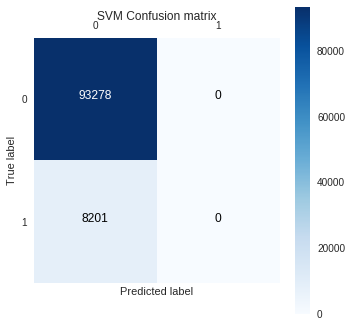

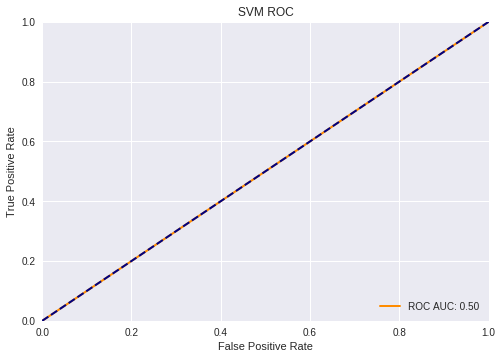

In [12]:
# train SVM
SVM = svm.LinearSVC()
SVM.fit(X_train, y_train)

# get prediction accuracy
crossVal = cross_val_score(SVM, X_train, y_train, cv=5)
print("Training Cross Validation: %0.2f" % (sum(crossVal) / float(len(crossVal)) * 100), "%")
accuracy = SVM.score(X_test, y_test)
print("Test Accuraccy: ", accuracy * 100, "%")

#F1 Score
y_predicted = SVM.predict(X_test)
print("F1 Score: ",f1_score(y_test, y_predicted))

# Confusion Matrix
SVM_confusion = metrics.confusion_matrix(y_test, y_predicted)
#SVM_confusion = SVM_confusion.astype('float') / SVM_confusion.sum(axis=1)[:, np.newaxis]
plt.matshow(SVM_confusion, cmap=plt.cm.Blues)
plt.grid(b=False)
plt.title("SVM Confusion matrix")
plt.colorbar()
thresh = SVM_confusion.max() / 2.
for i, j in itertools.product(range(SVM_confusion.shape[0]), range(SVM_confusion.shape[1])):
    plt.text(j, i, SVM_confusion[i, j],
    horizontalalignment="center",
    color="white" if SVM_confusion[i, j] > thresh else "black")
plt.ylabel('True label')
plt.xlabel('Predicted label')

# roc graph 
# scores = SVM.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_predicted)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC AUC: %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC')
plt.legend(loc="lower right")
plt.show()

Training Cross Validation: 91.46 %
Test Accuraccy:  91.23858138136954 %
F1 Score:  0.012440297678551593


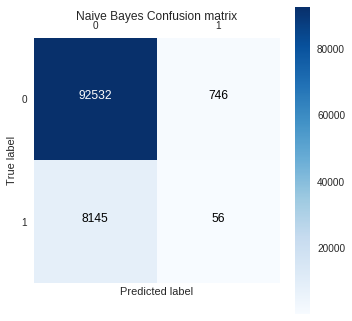

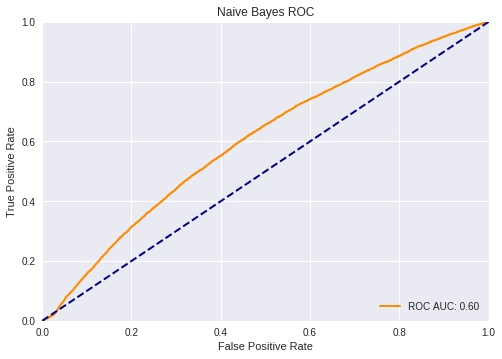

In [13]:
# train Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

# get prediction accuracy
crossVal = cross_val_score(nb, X_train, y_train, cv=5)
print("Training Cross Validation: %0.2f" % (sum(crossVal) / float(len(crossVal)) * 100), "%")
accuracy = nb.score(X_test, y_test)
print("Test Accuraccy: ", accuracy * 100, "%")

#F1 Score
y_predicted = nb.predict(X_test)
print("F1 Score: ",f1_score(y_test, y_predicted))

# Confusion Matrix
nb_confusion = metrics.confusion_matrix(y_test, y_predicted)
# nb_confusion = nb_confusion.astype('float') / nb_confusion.sum(axis=1)[:, np.newaxis]
plt.matshow(nb_confusion, cmap=plt.cm.Blues)
plt.grid(b=False)
plt.title("Naive Bayes Confusion matrix")
plt.colorbar()
thresh = nb_confusion.max() / 2.
for i, j in itertools.product(range(nb_confusion.shape[0]), range(nb_confusion.shape[1])):
    plt.text(j, i, nb_confusion[i, j],
    horizontalalignment="center",
    color="white" if nb_confusion[i, j] > thresh else "black")
plt.ylabel('True label')
plt.xlabel('Predicted label')

# roc graph
scores = nb.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, scores)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC AUC: %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes ROC')
plt.legend(loc="lower right")
plt.show()

Training Cross Validation: 91.92 %
Accuraccy:  91.91064161057952 %
F1 Score:  0.036162968181284484


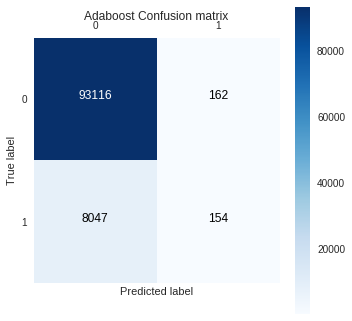

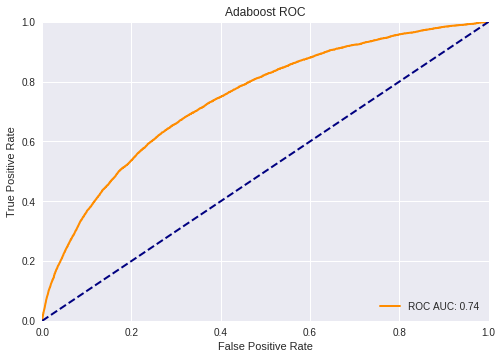

In [14]:
# train Adaboost
boost = AdaBoostClassifier(n_estimators=50)
boost.fit(X_train, y_train)

# get prediction accuracy
crossVal = cross_val_score(boost, X_train, y_train, cv=5)
print("Training Cross Validation: %0.2f" % (sum(crossVal) / float(len(crossVal)) * 100), "%")
accuracy = boost.score(X_test, y_test)
print("Accuraccy: ", accuracy * 100, "%")

#F1 Score
y_predicted = boost.predict(X_test)
print("F1 Score: ",f1_score(y_test, y_predicted))

# Confusion Matrix
boost_confusion = metrics.confusion_matrix(y_test, y_predicted)
#boost_confusion = boost_confusion.astype('float') / boost_confusion.sum(axis=1)[:, np.newaxis]
plt.matshow(boost_confusion, cmap=plt.cm.Blues)
plt.grid(b=False)
plt.title("Adaboost Confusion matrix")
plt.colorbar()
thresh = boost_confusion.max() / 2.
for i, j in itertools.product(range(boost_confusion.shape[0]), range(boost_confusion.shape[1])):
    plt.text(j, i, boost_confusion[i, j],
    horizontalalignment="center",
    color="white" if boost_confusion[i, j] > thresh else "black")
plt.ylabel('True label')
plt.xlabel('Predicted label')

# roc graph
scores = boost.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, scores)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC AUC: %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Adaboost ROC')
plt.legend(loc="lower right")
plt.show()

Training Cross Validation: 91.93 %
Accuraccy:  91.92148129169581 %
F1 Score:  0.002918997810751642


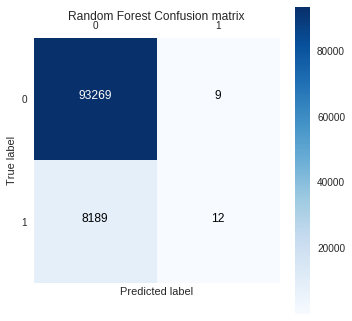

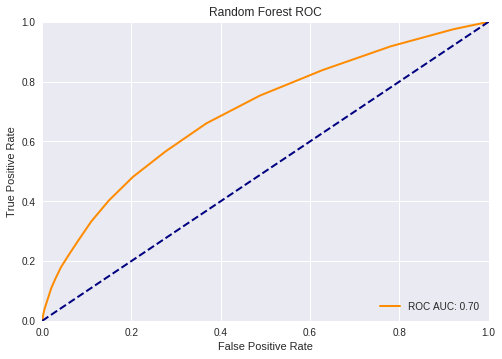

In [15]:
# train Random Forest
randomForest = RandomForestClassifier(n_estimators = 50, random_state = 50, n_jobs = -1)
randomForest.fit(X_train, y_train)

# get prediction accuracy
crossVal = cross_val_score(randomForest, X_train, y_train, cv=5)
print("Training Cross Validation: %0.2f" % (sum(crossVal) / float(len(crossVal)) * 100), "%")
accuracy = randomForest.score(X_test, y_test)
print("Accuraccy: ", accuracy * 100, "%")

#F1 Score
y_predicted = randomForest.predict(X_test)
print("F1 Score: ",f1_score(y_test, y_predicted))

# Confusion Matrix
rf_confusion = metrics.confusion_matrix(y_test, y_predicted)
#rf_confusion = rf_confusion.astype('float') / rf_confusion.sum(axis=1)[:, np.newaxis]
plt.matshow(rf_confusion, cmap=plt.cm.Blues)
plt.grid(b=False)
plt.title("Random Forest Confusion matrix")
plt.colorbar()
thresh = rf_confusion.max() / 2.
for i, j in itertools.product(range(rf_confusion.shape[0]), range(rf_confusion.shape[1])):
    plt.text(j, i, rf_confusion[i, j],
    horizontalalignment="center",
    color="white" if rf_confusion[i, j] > thresh else "black")
plt.ylabel('True label')
plt.xlabel('Predicted label')

# roc Graph
scores = randomForest.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, scores)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC AUC: %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC')
plt.legend(loc="lower right")
plt.show()

Training Cross Validation: 80.21 %
Accuraccy:  91.91064161057952 %
F1 Score:  0.0


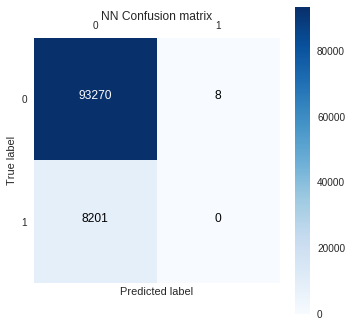

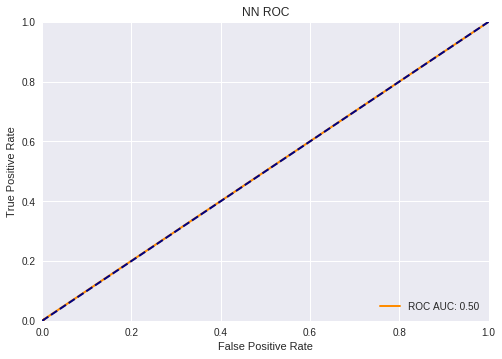

In [17]:
# train NN
nn = MLPClassifier()
nn.fit(X_train, y_train)

# get prediction accuracy
crossVal = cross_val_score(nn, X_train, y_train, cv=5)
print("Training Cross Validation: %0.2f" % (sum(crossVal) / float(len(crossVal)) * 100), "%")
accuracy = nn.score(X_test, y_test)
print("Accuraccy: ", accuracy * 100, "%")


#F1 Score
y_predicted = nn.predict(X_test)
print("F1 Score: ",f1_score(y_test, y_predicted))

# Confusion Matrix
nn_confusion = metrics.confusion_matrix(y_test, y_predicted)
#nn_confusion = nn_confusion.astype('float') / nn_confusion.sum(axis=1)[:, np.newaxis]
plt.matshow(nn_confusion, cmap=plt.cm.Blues)
plt.grid(b=False)
plt.title("NN Confusion matrix")
plt.colorbar()
thresh = nn_confusion.max() / 2.
for i, j in itertools.product(range(nn_confusion.shape[0]), range(nn_confusion.shape[1])):
    plt.text(j, i, nn_confusion[i, j],
    horizontalalignment="center",
    color="white" if nn_confusion[i, j] > thresh else "black")
plt.ylabel('True label')
plt.xlabel('Predicted label')

# roc graph 
scores = nn.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, scores)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC AUC: %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('NN ROC')
plt.legend(loc="lower right")
plt.show()